# Notebook d'ananlyse de données du système éducatif

## Table des matières
* [1 - Analyse et reformulation de l'énoncé](#1)
* [2 - Import et compréhension des données](#2)
    * [Description des données](#description)
* [3 - Choix des indicateurs](#indicators)
* [4 - Pré-filtrage des données](#prefilter)
    * [Suppression des autres indicateurs](#removing)
    * [Suppression des colonnes entièrement vides](#dropna)
    * [Suppression des pays trop petits](#small-countries)
    * [Suppression des années mal renseignées](#years)
    * [Taux de remplissage global de chaque indicateur](#fillings)
    * [Taux de remplissage par région géographique](#geofillings)
* [5 - Regroupement des indicateurs](#grouping)
* [6 - Second filtrage des données](#filtering)
    * [Suppression des pays trop pauvres](#poor-countries)
    * [Sélection du bon indicateur de population](#population)
    * [Remise au propre des données finales](#final-data)
* [7 - Etude des indicateurs par région géographique](#geoanalysis)
* [8 - Scoring des pays](#scoring)
    * [Classement des pays avec des coefficients égaux (référence)](#reference-ranking)
    * [Impact de la modification des pondérations - Méthode Borda](#borda)
* [9 - Conclusion](#conclusion)


## 1 Analyse et reformulation de l'énoncé

### Description des Données


1-La base de données EdStatsCountry-Series représente une collection de séries de données éducatives pour différents pays. Elle fournit des informations sur des indicateurs tels que l'accès à l'éducation, les taux de scolarisation, les dépenses publiques dans l'éducation, 

 Nous avons dans cette base de données 613 ligne et 4 colonnes
 
**CountryCode** : représente le code des pays

**SeriesCode**:  représente un identifiant unique attribué à chaque série de données éducatives.
Il permet de différencier et d'organiser les différentes séries de données disponibles dans la base.

**DESCRIPTION** : c'est la descripion de ces données

Une série de données dans la base de données EdStatsCountry-Series peut contenir différentes informations liées à l'éducation d'un pays. Cela peut inclure des données sur les taux de scolarisation, les dépenses publiques dans l'éducation, les résultats des tests standardisés, les indicateurs de qualité de l'éducation, les effectifs scolaires, les ratios élèves-enseignants, etc. Chaque série de données est spécifique à un indicateur particulier et peut être utilisée pour analyser et comparer les performances éducatives entre les pays.**

2-**EdStatsData.csv** donne l'évolution de plusieurs indicateurs pour tous les pays et zones géographiques du monde
footnote donne des Informations sur année d'origine des données et description des données.**

3-**Les données "EdStatsCountry"** représentent des informations sur les pays en ce qui concerne les statistiques de l'éducation. Cela peut inclure des données telles que le nombre d'étudiants inscrits, le taux d'alphabétisation, les dépenses publiques en éducation, les résultats des tests scolaires, etc. Ces données permettent d'analyser et de comparer les performances éducatives des différents pays.**

4-**La base de données EdStatsFootNote** contient des informations supplémentaires et des notes de bas de page liées aux données de la base de données EdStatsData. Elle fournit des détails sur la source des données, les méthodologies utilisées pour collecter les données, les définitions des indicateurs, les limitations des données**

5-**La base de données EdStatsSeries contient des informations sur les séries d'indicateurs éducatifs disponibles dans la base de données EdStatsData. Elle fournit des détails sur chaque série d'indicateurs, tels que le nom de la série, la description, la source des données, les unités de mesure, la période de couverture, etc. La base de données EdStatsSeries permet aux utilisateurs de comprendre les différents indicateurs éducatifs disponibles dans la base de données EdStatsData et de sélectionner les séries d'indicateurs pertinentes pour leurs analyses et leurs recherches.**

## Importation des modules pour ce notebook

In [5]:
import education

### Modules usuels

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
print(plt.style.available)
plt.style.use('ggplot')
import os

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [18]:
# Chemin vers le répertoire 
repertoire = r'C:\Users\HSPH9696\formation_OPC\git_formation\BF_P2_analysez-des-donnees-de-systemes-educatifs-1_2023-11-17T151745\projet2 education\in'
dataframes = []

for fichier in os.listdir(repertoire):
    if fichier.endswith('.csv'):
        print(f"Fichier trouvé : {fichier}")
        
        chemin_complet = os.path.join(repertoire, fichier)
        df = pd.read_csv(chemin_complet)
        dataframes.append(df)

if dataframes:
    print(dataframes[0].head())
else:
    print("Aucun fichier CSV trouvé dans le répertoire.")


Fichier trouvé : data_Total.csv


C:\Users\HSPH9696\AppData\Local\Temp\ipykernel_14704\3901732170.py:10: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(chemin_complet)


Fichier trouvé : EdStatsCountry-Series.csv
Fichier trouvé : EdStatsCountry.csv
Fichier trouvé : EdStatsData.csv
Fichier trouvé : EdStatsFootNote.csv
Fichier trouvé : EdStatsSeries.csv
   Unnamed: 0 Country Name Country Code  \
0  0           Arab World   ARB           
1  1           Arab World   ARB           
2  2           Arab World   ARB           
3  3           Arab World   ARB           
4  4           Arab World   ARB           

                                                            Indicator Name  \
0  Adjusted net enrolment rate, lower secondary, both sexes (%)              
1  Adjusted net enrolment rate, lower secondary, female (%)                  
2  Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   
3  Adjusted net enrolment rate, lower secondary, male (%)                    
4  Adjusted net enrolment rate, primary, both sexes (%)                      

   Indicator Code       2010      2011       2012      2013       2014  2015  \
0  UIS.N

In [22]:
import pandas as pd
import os

# Chemin vers le répertoire contenant les fichiers CSV
repertoire = r'C:\Users\HSPH9696\formation_OPC\git_formation\BF_P2_analysez-des-donnees-de-systemes-educatifs-1_2023-11-17T151745\projet2 education\in'

# Liste pour stocker les noms des fichiers CSV trouvés
file_names = ["data_Total.csv", 
              "EdStatsCountry-Series.csv", 
              "EdStatsCountry.csv", 
              "EdStatsData.csv", 
              "EdStatsFootNote.csv",
              "EdStatsSeries.csv"]

# Liste pour stocker les noms des fichiers CSV présents dans le répertoire
csv_files_found = []

# Itérer sur les fichiers dans le répertoire
for fichier in os.listdir(repertoire):
    if fichier in file_names:
        csv_files_found.append(fichier)
        print(f"Fichier trouvé : {fichier}")

# Vérifier si tous les fichiers attendus ont été trouvés
missing_files = [fichier for fichier in file_names if fichier not in csv_files_found]
if missing_files:
    print("Certains fichiers attendus n'ont pas été trouvés :")
    print(missing_files)
else:
    print("Tous les fichiers attendus ont été trouvés.")


Fichier trouvé : data_Total.csv
Fichier trouvé : EdStatsCountry-Series.csv
Fichier trouvé : EdStatsCountry.csv
Fichier trouvé : EdStatsData.csv
Fichier trouvé : EdStatsFootNote.csv
Fichier trouvé : EdStatsSeries.csv
Tous les fichiers attendus ont été trouvés.


<a name="description"></a>
### Description des données
Pour chacun des DataFrame ci-dessus j'utilise la méthode `.info()` qui nous permet de lister le nombre de lignes, le nombre de colonne, et pour chaque colonne, le nombre de valeur nulles.

In [4]:
def format_percentage(value):
    '''
    Format a percentage with 1 digit after comma 
    '''
    return "{0:.1f}%".format(value * 100)


# We create a table containing all information about the 5 files
files_description = pd.DataFrame(columns = ["Nb lignes", "Nb colonnes", "Taux remplissage moyen", "Doublons", "Description"],
                                 index = ["EdStatsCountry.csv", 
                                          "EdStatsSeries.csv", 
                                          "EdStatsData.csv", 
                                          "EdStatsCountry-Series.csv", 
                                          "EdStatsFootNote.csv"])

# Filling the total number rows in each file
files_description["Nb lignes"] = [
    len(countries.index),
    len(indicators.index),
    len(initial_data.index),
    len(series.index),
    len(footnotes.index)
]

# Filling the number of columns in each file
files_description["Nb colonnes"] = [
    len(countries.columns),
    len(indicators.columns),
    len(initial_data.columns),
    len(series.columns),
    len(footnotes.columns)
]

# Filling the fill-percentile of each file
# We use the mean() function twice to calculate the mean for each columns, and then the mean for the whole file
files_description["Taux remplissage moyen"] = [
    format_percentage(countries.notna().mean().mean()),
    format_percentage(indicators.notna().mean().mean()),
    format_percentage(initial_data.notna().mean().mean()),
    format_percentage(series.notna().mean().mean()),
    format_percentage(footnotes.notna().mean().mean())
]

# FIlling the number of duplicate keys for each file
files_description["Doublons"] = [
    countries.duplicated(subset=["Country Code"]).sum(),
    indicators.duplicated(subset=["Indicator Name"]).sum(),
    initial_data.duplicated(subset=["Country Code", "Indicator Name"]).sum(),
    series.duplicated(subset=["CountryCode", "SeriesCode"]).sum(),
    footnotes.duplicated(subset=["CountryCode", "SeriesCode", "Year"]).sum(),
]

# Finally adding a short description for each file
files_description["Description"] = [
    "Liste des pays avec leurs données principales",
    "Liste des indicateurs avec description, unité, période, etc...",
    "Données de chaque indicateur par pays et par année",
    "Description des différentes séries de données (majoritairement provenance)",
    "Commentaire pour chaque couple série de données / pays"
]


files_description

,Nb lignes,Nb colonnes,Taux remplissage moyen,Doublons,Description
EdStatsCountry.csv,241,32,69.5%,0,Liste des pays avec leurs données principales
EdStatsSeries.csv,3665,21,28.3%,0,"Liste des indicateurs avec description, unité,..."
EdStatsData.csv,886930,70,13.9%,0,Données de chaque indicateur par pays et par a...
EdStatsCountry-Series.csv,613,4,75.0%,0,Description des différentes séries de données ...
EdStatsFootNote.csv,643638,5,80.0%,0,Commentaire pour chaque couple série de donnée...


<a name="indicators"></a>
## C - Choix des indicateurs
L'idée est maintenant de trouver les indicateurs qui nous intéressent parmi les 3665 proposés. Pour répondre à notre problématique, on va tout d'abord se focaliser sur les idées suivantes : 
* Définir la **quantité d'étudiants** par pays en se basant, par exemple, sur la population par tranche d'âge.
* Définir l'**accès à internet**  : accès des étudiants à un ordinateur et une connexion internet correcte.
* Définir le **revenu moyen** du pays afin de savoir si les étudiants auront de quoi payer les cours en ligne.
* Définir la **langue principale du pays** : le français et l'anglais étant plus facile à traduire.

J'utilise la [liste des indicateurs](http://datatopics.worldbank.org/education/) afin de les trouver plus facilement.


In [5]:
# Preparing a list that will contains all the indicator codes we want to keep
choosen_indicators = []

### Population étudiante
Plusieurs indicateurs peuvent nous aider à cibler la population qui nous intéresse, sachant que l'on cherche à chiffrer l'effectif de la population lycée/université, soit environ la tranche d'âge 15-25 ans.
* **SP.POP.TOTL** : population totale à la mi-année décomposée en **SP.POP.TOTL.FE.IN** (femmes) et **SP.POP.TOTL.MA.IN** (hommes)
* **SP.POP.GROW** : taux de croissance de la population -> utile pour les projections futures
* **SP.POP.1524.TO.UN** : population totale de la tranche 15-24 ans
* **SP.SEC.TOTL.IN** : population totale ayant l'âge d'entrer en éducation secondaire (secondary ed.)
* **SP.SEC.UTOT.IN** : population totale ayant l'âge d'entrer en éducation secondaire élevée (upper secondary ed.)
* **SP.TER.TOTL.IN** : population totale ayant l'âge d'entrer en éducation tertiaire (tertiary ed.)

On va **tous les conserver dans un premier temps** et on analysera ensuite lequel (ou lesquels) sont les plus pertinents et les plus fiables pour notre utilisation (voir [plus bas dans le fichier](#population)).

In [6]:
population_indicators = ["SP.POP.TOTL", "SP.POP.GROW", "SP.POP.1524.TO.UN", "SP.SEC.TOTL.IN", "SP.SEC.UTOT.IN", 
                         "SP.TER.TOTL.IN"]

### Accès à internet
En terme de communication, deux indicateurs nous indiquent le pourcentage d'ordinateurs personnels et de connexion internet pour 100 habitants :

* **IT.NET.USER.P2** : pourcentage d'utilisateurs d'internet
* **IT.CMP.PCMP.P2** : pourcentage de possesseur d'un ordinateur personnel

J'ai également recherché des indicateurs concernant les **compétences informatique** mais si plusieurs sont indiqués dans la documentation de la banque mondiale, aucun n'est présent dans le dataset.

In [7]:
internet_indicators = ["IT.NET.USER.P2", "IT.CMP.PCMP.P2"]

### Revenu moyen du pays
Même si cet indicateur sera probablement fortement lié à l'accès à un ordinateur personnel, il nous permettra de savoir si la population a, ou non, sensiblement le même pouvoir d'achat que notre pays de référence.

Le dataset nous donne accès au **PNB par habitant** ainsi qu'au **PIB par habitant**. Ce dernier est le plus représentatif du niveau de vie moyen du pays, surtout qu'il est ici exprimé en "Parité de Pouvoir d'Achat" (**PPA** ou en anglais PPP) ce qui signifie qu'on tient compte du coût de la vie dans le pays. Cela permet d'avoir une comparaison plus fiable entre les pays.
* **NY.GDP.MKTP.PP.CD** :  PIB (PPP - Current US Dollar)
* **NY.GDP.PCAP.PP.CD** : PIB par habitant (PPP - Current US Dollar)

Pour nous, cet indicateur sera **obligatoire** : on supprimera du dataset tous les pays pour lesquels il n'est pas renseigné.

In [8]:
revenue_indicators = ["NY.GDP.PCAP.PP.CD"]

### Langue principale
Après étude détaillée des indicateurs, aucun ne semble actuellement nous renseigner sur la langue principale parlée dans le pays. C'est éventuellement une donnée que nous pourrons intégrer à posteriori pour départager 2 pays très proches en termes de score.

### Récapitulatif des indicateurs

In [9]:
choosen_indicators.extend(population_indicators)
choosen_indicators.extend(internet_indicators)
choosen_indicators.extend(revenue_indicators)
choosen_indicators

['SP.POP.TOTL',
 'SP.POP.GROW',
 'SP.POP.1524.TO.UN',
 'SP.SEC.TOTL.IN',
 'SP.SEC.UTOT.IN',
 'SP.TER.TOTL.IN',
 'IT.NET.USER.P2',
 'IT.CMP.PCMP.P2',
 'NY.GDP.PCAP.PP.CD']

<a name="prefilter"></a>
## D - Pré-filtrage des données
Le pré-filtrage effectué ici est une succession d'opération de filtrages facile à appliquer. Le but est de venir amputer le Dataset d'un grand nombre de lignes afin de faciliter les opérations de filtrages plus minutieuses à venir ensuite.
<a name="removing"></a>
### Suppression des indicateurs non retenus
On ne conserve maintenant que les lignes des indicateurs qui nous intéressent et on supprime également les colonnes non utiles tel que les noms de pays et les noms des indicateurs.

In [10]:
# Filtering the data set on the selected indicators
data = data[data["Indicator Code"].isin(choosen_indicators)]

# Displaying a warning if one choosen indicator is not in the dataset
if len(choosen_indicators) > len(data["Indicator Code"].unique()):
    print("ATTENTION : certains indicateurs n'ont pas été trouvé dans le tableau de données")
    
# Also removing columns that are not useful for the moment (we keep the keys columns)
data = data.drop(["Country Name", "Indicator Name"], axis=1, errors="ignore")

data

,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
1247,ARB,NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1375,ARB,IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2084,ARB,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2307,ARB,SP.POP.GROW,2.767219e+00,2.694623e+00,2.658899e+00,2.687857e+00,2.795847e+00,2.948191e+00,3.106885e+00,3.228207e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2323,ARB,SP.SEC.TOTL.IN,1.887675e+07,1.947298e+07,1.994125e+07,2.042827e+07,2.096031e+07,2.155374e+07,2.219776e+07,2.261543e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885588,ZWE,SP.SEC.TOTL.IN,6.752820e+05,7.046000e+05,7.299310e+05,7.534980e+05,7.784100e+05,8.060640e+05,8.324490e+05,8.616450e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885591,ZWE,SP.TER.TOTL.IN,3.780360e+05,4.002460e+05,4.320310e+05,4.691810e+05,5.049590e+05,5.352320e+05,5.574990e+05,5.749350e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885597,ZWE,SP.SEC.UTOT.IN,4.302470e+05,4.526340e+05,4.701910e+05,4.845080e+05,4.986040e+05,5.148170e+05,5.304850e+05,5.487370e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885747,ZWE,SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a name="dropna"></a>
### Suppression des colonnes entièrement vides

In [11]:
data.dropna(axis=1, how="all", inplace=True)

<a name="small-countries"></a>
### Suppression des pays trop petits
Afin de faciliter le travail d'analyse à venir et réduire significativement le nombre de ligne, nous allons commencer par éliminer les pays à la population trop faible.

**Rappel** : la population minimale retenue ici est indiquée en début de Notebook au niveau des paramètres.

In [12]:
# Step 0 - Retrieving the population data from the main dataset
countries_populations = data[data["Indicator Code"] == "SP.POP.TOTL"]

# Step 1 - Removing columns where all values are NaN
countries_populations.reset_index(inplace=True)
countries_populations.set_index("Country Code", inplace=True)

# Step 2 - Calculating the mean population for each country
countries_populations = countries_populations.mean(axis=1).to_frame()
countries_populations.columns = ["Population"]

# Step 3 - Keeping countries codes
biggest_countries_codes = countries_populations[countries_populations["Population"] >= MINIMUM_POPULATION].index.values

# Finally filtering data
data = data[data["Country Code"].isin(biggest_countries_codes)]

<a name="years"></a>
### Suppression des années trop anciennes et mal renseignées
On va maintenant analyser le taux de remplissage des données de nos indicateurs retenus, par année, ce qui nous permettra d'en supprimer une partie.

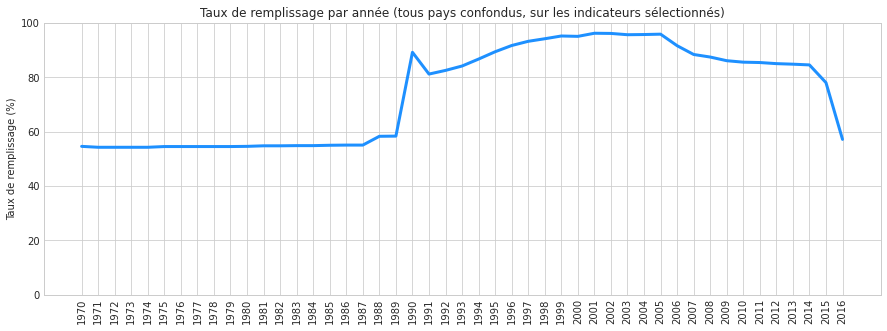

In [13]:
# For the next filterings, want to know the global "filling percentage" of all selected indicators merged
year_filling = data.drop(columns=["Country Code", "Indicator Code"]).notnull().sum(axis=0).to_frame()

# We calculate it as a percentile (max possible values per year = nb of countries * nb of indicators)
max_values = len(choosen_indicators) * len(data["Country Code"].unique())
year_filling = 100 * year_filling / max_values

fig1 = plt.figure(figsize=(15,5))
plt.title("Taux de remplissage par année (tous pays confondus, sur les indicateurs sélectionnés)")
plt.xticks(rotation = 90)
plt.ylim(ymin=0, ymax=100)
plt.ylabel("Taux de remplissage (%)")
plt.plot(year_filling.index.values, year_filling[0], color="dodgerblue", linewidth=3)

On constate plusieurs choses : 
* Les années **après 2016** avaient déjà été supprimées, ce qui signifie qu'elles étaient vides pour nos indicateurs. ON va toutefois exclure en plus l'année 2016 qui est significativement moins renseignée que 2015.
* Les années **avant 1990** sont moins remplies, et nous intéressent peu car internet n'est apparu qu'en 1991.

De plus, au vu de l'évolution rapide des nouvelles technologies, **il parait peut pertinent de conserver les années antérieures à 2005** (apparition de Youtube, Facebook, essor des réseaux sociaux et des plateformes de streaming) car elles sont peu représentatives des nouvelles technologies, et risqueraient ainsi de faire chuter nos indicateurs "technologiques" (accès internet et accès à des ordinateurs).

**CONCLUSION** : on ne conserve que **les années après 2005 (inclue) et avant 2016 (exclue)**.

Ces 2 années sont mises en paramètre en début de Notebook.

In [14]:
# The MIN_YEAR variable has been defined at the beginning of the notebook

# We save the data before filtering it because we need it below
data_before_year_filtering = data.copy(deep=True)

# Isolating the columns we want to drop from the DF
years = list(filter(lambda x: re.match("^\d{4}$", x), data.columns.values))
dropped_years = [year for year in years if int(year) < MIN_YEAR or int(year) > MAX_YEAR]

# Finally removing the unwanted values
data = data.drop(columns=dropped_years)

data

,Country Code,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1247,ARB,NY.GDP.PCAP.PP.CD,1.140472e+04,1.228111e+04,1.300436e+04,1.373891e+04,1.385056e+04,1.444467e+04,1.482591e+04,1.571614e+04,1.605255e+04,NaN,NaN
1375,ARB,IT.NET.USER.P2,8.393142e+00,1.165465e+01,1.420590e+01,1.859353e+01,2.297369e+01,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN
2084,ARB,IT.CMP.PCMP.P2,5.305007e+00,6.676681e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2307,ARB,SP.POP.GROW,2.311472e+00,2.356627e+00,2.386344e+00,2.381136e+00,2.323576e+00,2.230786e+00,2.128048e+00,2.063874e+00,2.012570e+00,NaN,NaN
2323,ARB,SP.SEC.TOTL.IN,4.262789e+07,4.298773e+07,4.404203e+07,4.428236e+07,4.425107e+07,4.428212e+07,4.427659e+07,4.435677e+07,4.446921e+07,43786276.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885588,ZWE,SP.SEC.TOTL.IN,2.034066e+06,2.026737e+06,2.020780e+06,2.016726e+06,2.015706e+06,2.018022e+06,2.009047e+06,2.007007e+06,2.012733e+06,2026425.0,2047619.0
885591,ZWE,SP.TER.TOTL.IN,1.542683e+06,1.554849e+06,1.565455e+06,1.576742e+06,1.589291e+06,1.602057e+06,1.601799e+06,1.601931e+06,1.602843e+06,1604698.0,1607620.0
885597,ZWE,SP.SEC.UTOT.IN,1.344484e+06,1.341028e+06,1.338730e+06,1.337559e+06,1.337565e+06,1.338788e+06,1.331526e+06,1.327364e+06,1.327040e+06,1331677.0,1342035.0
885747,ZWE,SP.POP.1524.TO.UN,3.266903e+06,3.309907e+06,3.342927e+06,3.366486e+06,3.381553e+06,3.389035e+06,3.389423e+06,3.383141e+06,3.371070e+06,3354236.0,3333716.0


<a name="fillings"></a>
### Taux de remplissage global de chaque indicateur
On vérifie maintenant les taux de remplissage de nos indicateurs sur les années sélectionnées.

<BarContainer object of 9 artists>

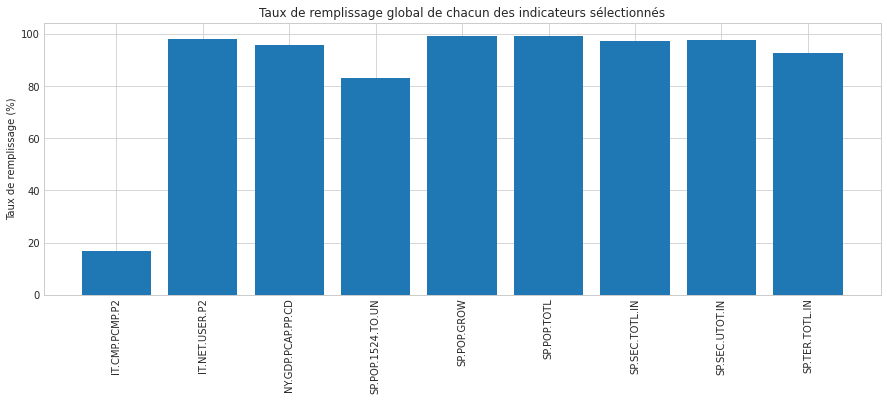

In [15]:
# We count how many values (non NaN) we have for each indicator and we devide it by the number of countries
indicator_filling = (data
                     .drop(columns=["Country Code"])
                     .set_index("Indicator Code")
                     .notnull()
                     .groupby("Indicator Code")
                     .sum())
indicator_filling = 100 * indicator_filling / len(data["Country Code"].unique())

# Plotting the result
fig2 = plt.figure(figsize=(15,5))
plt.title("Taux de remplissage global de chacun des indicateurs sélectionnés")
plt.xticks(rotation = 90)
plt.ylabel("Taux de remplissage (%)")
plt.bar(indicator_filling.index.values, indicator_filling.mean(axis=1))

On constate que tous les indicateurs sont **très bien renseignés** à l'exception de "**IT.CMP.PCMP.P2**".

Cet indicateur est à 0% de remplissage sur les années sélectionnées, ce qui est gênant car c'est un indicateur primordial pour la suite de notre étude. 

Nous allons voir à quel point il est rempli dans les autres années.

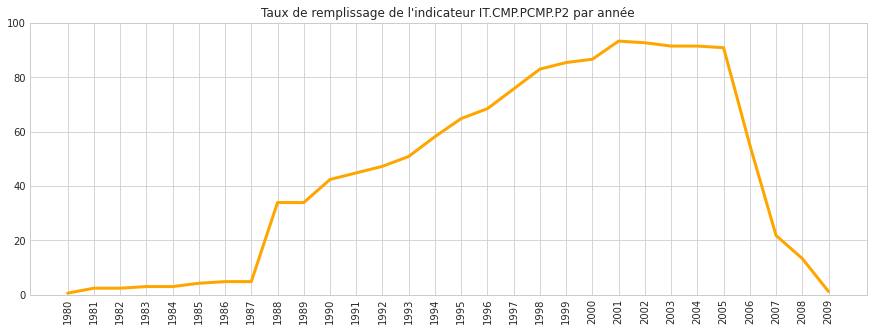

In [16]:
# We calculate the filling percentage of the given indicator for each year > 0
pcmp_filling = data_before_year_filtering[data_before_year_filtering["Indicator Code"] == "IT.CMP.PCMP.P2"]
pcmp_filling = (pcmp_filling
                .drop(columns=["Country Code"])
                .set_index("Indicator Code")
                .notnull()
                .groupby("Indicator Code")
                .sum())
pcmp_filling = pcmp_filling / len(data_before_year_filtering["Country Code"].unique())
pcmp_filling = pcmp_filling.loc[:, (pcmp_filling != 0).any(axis=0)]

# We plot the results
fig3 = plt.figure(figsize=(15,5))
plt.title("Taux de remplissage de l'indicateur IT.CMP.PCMP.P2 par année")
plt.xticks(rotation = 90)
plt.ylim(ymin=0, ymax=100)
plt.plot(pcmp_filling.columns.values, 100 * pcmp_filling.loc["IT.CMP.PCMP.P2"], color="orange", linewidth=3)

**CONCLUSION** : pour cet indicateur-là, nous allons prendre une moyenne sur les années **2001-2005**.

<a name="geofillings"></a>
### Taux de remplissage par région géographique
On veut maintenant regarder si les indicateurs sont mieux remplis dans certaines portions du monde, ce qui nous permettrait d'éliminer certains continent si les indicateurs y sont très mal renseignés.

Pour cela, on utilise la colonne "Region" du fichier des pays ; et on calcul un pourcentage au prorata du nombre de pays dans chaque continent (pour éviter d'avoir, par exemple, l'Amérique du Noed avec un score faible, du fait qu'elle ne contient que 2 pays).

                            2005  2006  2007  2008  2009  2010  2011  2012  \
Region                                                                       
East Asia & Pacific          154   151   145   142   141   140   139   138   
Europe & Central Asia        360   351   337   332   325   322   321   322   
Latin America & Caribbean    195   177   179   178   174   171   174   174   
Middle East & North Africa   138   136   131   129   124   123   122   120   
North America                 18    18    16    16    16    16    16    16   
South Asia                    53    51    49    48    48    48    48    47   
Sub-Saharan Africa           306   284   280   279   276   276   274   271   

                            2013  2014  2015  
Region                                        
East Asia & Pacific          137   139   135  
Europe & Central Asia        322   323   314  
Latin America & Caribbean    174   173   172  
Middle East & North Africa   120   123   121  
North America  

<BarContainer object of 7 artists>

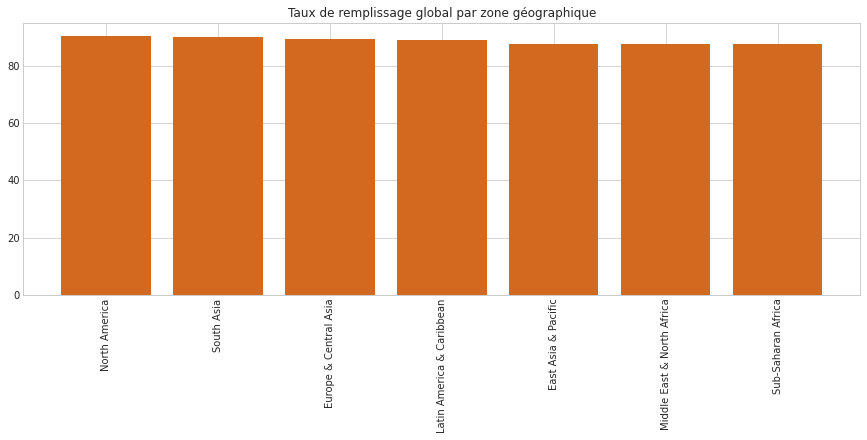

In [17]:
# Step 1 - We isolate country code and region from country file and kipping only on our selected countries
regions = (countries[countries["Country Code"].isin(biggest_countries_codes)]
           .set_index("Country Code")
           .filter(items=["Region"]))

# Step 2 - We also calculate how many countries we have per region in order to calculate our percentile 
country_per_region = (regions
                      .reset_index()
                      .set_index("Region")
                      .notnull()
                      .groupby("Region")
                      .sum())
country_per_region.columns = ["Total countries"]

# Step 3 - We count how many indicators are filled for each Region
geographical_data = data.copy(deep=True)
geographical_data = (geographical_data
                     .merge(regions, how="left", on="Country Code")
                     .drop(columns=["Country Code", "Indicator Code"])
                     .dropna(axis=0, how="any", subset=["Region"])
                     .set_index("Region")
                     .notnull()
                     .groupby("Region")
                     .sum())
nb_of_years = len(geographical_data.columns)
print(geographical_data)
geographical_data = geographical_data.sum(axis=1).to_frame().astype("float")


# Step 4 - We divide the number of filled indicators by the number of theoretical indicators per region
for region, total in geographical_data.itertuples():
    region_max = country_per_region.loc[region]["Total countries"] * nb_of_years * len(choosen_indicators)
    geographical_data.loc[region][0] = geographical_data.loc[region][0] / region_max

# Step 5 - We sort the results to improve chart readability
geographical_data.sort_values(by=[0], axis=0, ascending=False, inplace=True)

# We plot the results
fig4 = plt.figure(figsize=(15,5))
plt.title("Taux de remplissage global par zone géographique")
plt.xticks(rotation = 90)
plt.bar(geographical_data.index.values, 100 * geographical_data[0], color="chocolate")

**CONCLUSION** : pour les indicateurs sélectionnés, on ne note pas de disparité particulière en terme de remplissage. **Toutes les zones géographiques peuvent donc être analysées.**

<a name="grouping"></a>
## E - Regroupement des indicateurs
Le but de cette partie est de créer un tableau qui contient une ligne par pays, et une colonne par indicateur avec la valeur finale conservée pour celui-ci. On va traiter séparément notre indicateur **IT.CMP.PCMP.P2** qui n'a pas de valeur pour les années sélectionnées.

In [18]:
# We create a table with the mean value of each indicator for each country
final_indicators_values = (
                           (data[data["Indicator Code"].isin(choosen_indicators)]
                            .groupby(["Country Code", "Indicator Code"])
                            .mean()
                           )
                           .mean(axis=1)
                           .to_frame()
                           .unstack(level=1)
                           .droplevel(0, axis=1)
                           .drop(columns=["IT.CMP.PCMP.P2"]))

# Now we have to fill the IT.CMP.PCMP.P2 indicator with the 2011-2005 years
pcmp_data = initial_data.copy(deep=True)
kept_years = ["2001", "2002", "2003", "2004", "2005"]
pcmp_data = (pcmp_data[(pcmp_data["Indicator Code"] == "IT.CMP.PCMP.P2") 
                       & (pcmp_data["Country Code"].isin(biggest_countries_codes))]
             .drop(columns=["Country Name", "Indicator Name", "Indicator Code"])
             .set_index("Country Code")
             .filter(items=kept_years)
             .mean(axis=1)
             .to_frame())
pcmp_data.columns = ["IT.CMP.PCMP.P2"]

# And we merge it with the previous dataframe
final_indicators_values = final_indicators_values.merge(pcmp_data, how="left", left_index=True, right_index=True)

final_indicators_values

,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SP.POP.1524.TO.UN,SP.POP.GROW,SP.POP.TOTL,SP.SEC.TOTL.IN,SP.SEC.UTOT.IN,SP.TER.TOTL.IN,IT.CMP.PCMP.P2
Country Code,,,,,,,,,
AFG,4.203256,1522.744280,6.086033e+06,3.050737,2.911948e+07,3.951402e+06,1.851418e+06,2.617563e+06,0.341903
AGO,4.767579,5615.334689,3.759384e+06,3.543825,2.350760e+07,3.086217e+06,1.409631e+06,1.999056e+06,0.288022
ALB,38.632626,9151.101768,5.922224e+05,-0.450159,2.930218e+06,4.242545e+05,2.027324e+05,2.770651e+05,1.298910
ARB,22.573194,13924.325331,NaN,2.243826,3.399244e+08,4.393621e+07,2.143393e+07,3.434931e+07,3.523555
ARE,70.899999,67696.458346,6.966785e+05,7.328954,7.591034e+06,4.965165e+05,2.363435e+05,3.818900e+05,19.040030
...,...,...,...,...,...,...,...,...,...
WLD,28.811730,13019.761900,NaN,1.220566,6.932254e+09,7.735857e+08,3.908681e+08,6.032868e+08,9.487885
YEM,12.317576,3865.832112,5.322463e+06,2.692212,2.366675e+07,3.527940e+06,1.719501e+06,2.518379e+06,1.110148
ZAF,26.180016,11885.731155,9.791719e+06,1.430610,5.111124e+07,5.242876e+06,3.152177e+06,5.215752e+06,7.507682


<a name="filtering"></a>
## F - Second filtrage des données
<a name="poor-countries"></a>
### Suppression des pays trop pauvres
Nous allons à présent enlever du dataset les pays dont le PIB est trop inférieur à celui **de la France** qui est notre pays de référence.

Nous pouvons nous appuyer sur le **PNB par habitant PPA** car nous avons vérifé (lors de l'étape suivante) que c'était un indicateur fiable dans notre set d'années et de pays.

In [19]:
# At first we calculate the mean GDP PPP of our reference country (France)
fra_gdp_ppp = (data[(data["Country Code"] == "FRA") & (data["Indicator Code"] == "NY.GDP.PCAP.PP.CD")]
               .drop(columns=["Country Code", "Indicator Code"])
               .mean(axis=1)
               .values[0])

# Now we calculate the min GDP PPP we want 
min_gdp_ppp = fra_gdp_ppp * (1 - (MAX_REVENUE_PERCENT_DIFF / 100))

final_indicators_values = final_indicators_values[final_indicators_values["NY.GDP.PCAP.PP.CD"] >= min_gdp_ppp]

print("Après filtrage par PIB, il reste " + str(len(final_indicators_values)) + " pays.")
final_indicators_values

Après filtrage par PIB, il reste 32 pays.


,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SP.POP.1524.TO.UN,SP.POP.GROW,SP.POP.TOTL,SP.SEC.TOTL.IN,SP.SEC.UTOT.IN,SP.TER.TOTL.IN,IT.CMP.PCMP.P2
Country Code,,,,,,,,,
ARE,70.899999,67696.458346,6.966785e+05,7.328954,7.591034e+06,4.965165e+05,2.363435e+05,3.818900e+05,19.040030
AUS,75.533792,40319.447119,2.893898e+06,1.519595,2.202987e+07,1.723876e+06,5.868987e+05,1.549280e+06,55.919977
AUT,74.253159,43121.353596,9.985681e+05,0.499110,8.390539e+06,7.453200e+05,3.861671e+05,5.147685e+05,52.812582
BEL,73.230281,39945.278170,1.257487e+06,0.715277,1.089967e+07,7.523212e+05,5.060148e+05,6.570575e+05,30.904856
CAN,80.177273,40888.846541,4.436876e+06,1.033865,3.402655e+07,2.524405e+06,1.574099e+06,2.295170e+06,60.959971
CHE,81.728371,53839.470734,9.425225e+05,1.036866,7.832566e+06,6.209898e+05,3.611246e+05,4.729457e+05,76.853553
DEU,79.690891,40353.950827,9.329035e+06,-0.091866,8.153792e+07,7.436282e+06,2.631099e+06,4.712173e+06,48.211173
DNK,89.456384,42543.280718,6.623500e+05,0.457528,5.544234e+06,4.124765e+05,2.050826e+05,3.283835e+05,61.743074
EMU,68.015795,36290.212686,NaN,0.323312,3.350522e+08,2.612996e+07,1.193730e+07,1.928620e+07,36.727793


<a name="population"></a>
### Sélection du bon indicateur de population
Il nous reste à présent à choisir l'indicateur de population le plus efficace. Le plus pratique serait le nombre d'habitants de la tranche 15-24 ans mais on avait vu plus haut qu'il n'est pas très bien renseigné. Regardons à présent à quel point il est fiable sur les derniers pays restants.

Pour cela on va afficher la liste des pays pour lesquels il n'est pas renseigné et regarder si ces pays sont importants pour nous ou non.

In [20]:
pop_1524 = (final_indicators_values.merge(countries[["Country Code", "Short Name"]].set_index("Country Code"), 
                              left_index=True, 
                              right_index=True))[["SP.POP.1524.TO.UN", "Short Name"]]

pop_1524[pop_1524["SP.POP.1524.TO.UN"].isnull()]

,SP.POP.1524.TO.UN,Short Name
Country Code,,
EMU,NaN,Euro area
EUU,NaN,European Union
HIC,NaN,High income
NAC,NaN,North America
OED,NaN,OECD members
PRI,NaN,Puerto Rico


On constate que, à part Puerto Rico, les autres lignes ne sont pas des pays mais des regroupement de pays. 
Dans la suite de cette analyse, on fait donc les choix suivants : 
* Ignorer Puerto Rico
* Ne conserver comme indicateur de population que cet indicateur **SP.POP.1524.TO.UN**

<a name="final-data"></a>
### Remise au propre des données finales
On peut maintenant conserver uniquement nos 5 indicateurs finaux et remettre ainsi nos données au propre en ajoutant au passage le nom de chaque pays afin de mieux s'y retrouver.

In [21]:
indicators_names = {
    'IT.NET.USER.P2': 'Utilisateurs Internet (%)', 
    'NY.GDP.PCAP.PP.CD': 'PIB par hab (PPA)', 
    'SP.POP.1524.TO.UN': 'Population 15-24 ans',
    'SP.POP.GROW': 'Croissance pop. (%)',
    'IT.CMP.PCMP.P2': 'Possesseurs PC (%)',
    'Short Name': 'Country Name'
}

final_indicators_values = (final_indicators_values
                           .dropna(subset=["SP.POP.1524.TO.UN"])
                           .drop(columns=["SP.POP.TOTL", "SP.SEC.TOTL.IN", "SP.SEC.UTOT.IN", "SP.TER.TOTL.IN"], errors="ignore")
                           .merge(countries[["Country Code", "Short Name"]].set_index("Country Code"), 
                              left_index=True, 
                              right_index=True)
                           .rename(columns=indicators_names))

final_indicators = indicators_names.keys()
final_indicators_values

,Utilisateurs Internet (%),PIB par hab (PPA),Population 15-24 ans,Croissance pop. (%),Possesseurs PC (%),Country Name
Country Code,,,,,,
ARE,70.899999,67696.458346,6.966785e+05,7.328954,19.040030,United Arab Emirates
AUS,75.533792,40319.447119,2.893898e+06,1.519595,55.919977,Australia
AUT,74.253159,43121.353596,9.985681e+05,0.499110,52.812582,Austria
BEL,73.230281,39945.278170,1.257487e+06,0.715277,30.904856,Belgium
CAN,80.177273,40888.846541,4.436876e+06,1.033865,60.959971,Canada
CHE,81.728371,53839.470734,9.425225e+05,1.036866,76.853553,Switzerland
DEU,79.690891,40353.950827,9.329035e+06,-0.091866,48.211173,Germany
DNK,89.456384,42543.280718,6.623500e+05,0.457528,61.743074,Denmark
ESP,64.052236,32197.603080,4.677938e+06,0.717680,23.383816,Spain


<a name="geoanalysis"></a>
## G - Etude des indicateurs par région géographique
Maintenant que nous avons sélectionné nos 5 indicateurs principaux, nous allons étudier leurs indicateurs statistiques pour les différentes zones géographiques.


In [22]:
indicator_analysis_base_data = initial_data.copy(deep=True)

indicator_analysis_base_data = (indicator_analysis_base_data[indicator_analysis_base_data["Indicator Code"].isin(final_indicators)]
                           .drop(columns=["Country Name", "Indicator Name"])
                           .reset_index())

# We add the geographic region
regions = (countries[countries["Country Code"].isin(biggest_countries_codes)]
           .set_index("Country Code")
           .filter(items=["Region"]))
indicator_analysis_base_data = indicator_analysis_base_data.merge(regions, left_on="Country Code", right_index=True)

### Indicateurs principaux : moyenne, médiane, écart-type

In [23]:
# We use the initial data for that 
indicator_analysis = indicator_analysis_base_data.copy(deep=True)

indicator_analysis = (indicator_analysis
                           .drop(columns=["index", "Country Code"], errors="ignore")
                           .groupby(["Indicator Code", "Region"]).mean())

# Calculating the main statistic indicators
indicator_analysis_mean = indicator_analysis.mean(axis=1).to_frame()
indicator_analysis_std = indicator_analysis.std(axis=1).to_frame()
indicator_analysis_med = indicator_analysis.median(axis=1).to_frame()

indicator_analysis_mean = indicator_analysis_mean.merge(indicator_analysis_std, left_index=True, right_index=True)
indicator_analysis_mean = indicator_analysis_mean.merge(indicator_analysis_med, left_index=True, right_index=True)

indicator_analysis_mean.columns = ["Mean", "Std", "Median"]

indicator_analysis_mean

Mean           Std  \
Indicator Code    Region                                                   
IT.CMP.PCMP.P2    East Asia & Pacific         1.394368e+01  1.212184e+01   
                  Europe & Central Asia       1.484602e+01  9.808040e+00   
                  Latin America & Caribbean   3.422365e+00  2.366942e+00   
                  Middle East & North Africa  5.669726e+00  4.194042e+00   
                  North America               2.899762e+01  2.497240e+01   
                  South Asia                  6.095850e-01  8.072253e-01   
                  Sub-Saharan Africa          5.873834e-01  7.185590e-01   
IT.NET.USER.P2    East Asia & Pacific         1.397064e+01  1.787119e+01   
                  Europe & Central Asia       2.974030e+01  2.552248e+01   
                  Latin America & Caribbean   1.547850e+01  1.683019e+01   
                  Middle East & North Africa  1.022638e+01  1.647472e+01   
                  North America               4.883521e+01  3.160498e+01   
                  South Asia                  4.149629e+00  6.092222e+00   
                  Sub-Saharan Africa          1.923249e+00  3.851009e+00   
NY.GDP.PCAP.PP.CD East Asia & Pacific         1.507965e+04  5.544415e+03   
                  Europe & Central Asia       1.842977e+04  6.394508e+03   
                  Latin America & Caribbean   9.097194e+03  2.643439e+03   
                  Middle East & North Africa  1.892733e+04  3.109714e+03   
                  North America               3.639272e+04  9.656510e+03   
                  South Asia                  2.885854e+03  1.191575e+03   
                  Sub-Saharan Africa          1.879969e+03  5.604411e+02   
SP.POP.1524.TO.UN East Asia & Pacific         1.951070e+07  7.565405e+05   
                  Europe & Central Asia       3.073754e+06  1.445668e+05   
                  Latin America & Caribbean   4.721495e+06  2.884619e+05   
                  Middle East & North Africa  4.148754e+06  5.920166e+05   
                  North America               2.264608e+07  1.815660e+06   
                  South Asia                  4.699579e+07  6.493976e+06   
                  Sub-Saharan Africa          4.230801e+06  8.848989e+05   
SP.POP.GROW       East Asia & Pacific         1.620263e+00  3.899153e-01   
                  Europe & Central Asia       5.139951e-01  3.506898e-01   
                  Latin America & Caribbean   1.693905e+00  4.433928e-01   
                  Middle East & North Africa  3.020804e+00  6.295971e-01   
                  North America               1.076619e+00  1.631074e-01   
                  South Asia                  2.013433e+00  4.144200e-01   
                  Sub-Saharan Africa          2.736764e+00  1.898191e-01   

                                                    Median  
Indicator Code    Region                                    
IT.CMP.PCMP.P2    East Asia & Pacific         1.087548e+01  
                  Europe & Central Asia       1.348624e+01  
                  Latin America & Caribbean   3.302535e+00  
                  Middle East & North Africa  4.700416e+00  
                  North America               2.192575e+01  
                  South Asia                  2.731324e-01  
                  Sub-Saharan Africa          4.007927e-01  
IT.NET.USER.P2    East Asia & Pacific         1.369913e+00  
                  Europe & Central Asia       2.906466e+01  
                  Latin America & Caribbean   9.197555e+00  
                  Middle East & North Africa  1.552896e-01  
                  North America               6.294856e+01  
                  South Asia                  1.203664e+00  
                  Sub-Saharan Africa          3.310312e-02  
NY.GDP.PCAP.PP.CD East Asia & Pacific         1.353169e+04  
                  Europe & Central Asia       1.674627e+04  
                  Latin America & Caribbean   8.130944e+03  
                  Middle East & North Africa  1.873733e+04  
                  Nor

### Evolution des indicateurs choisis

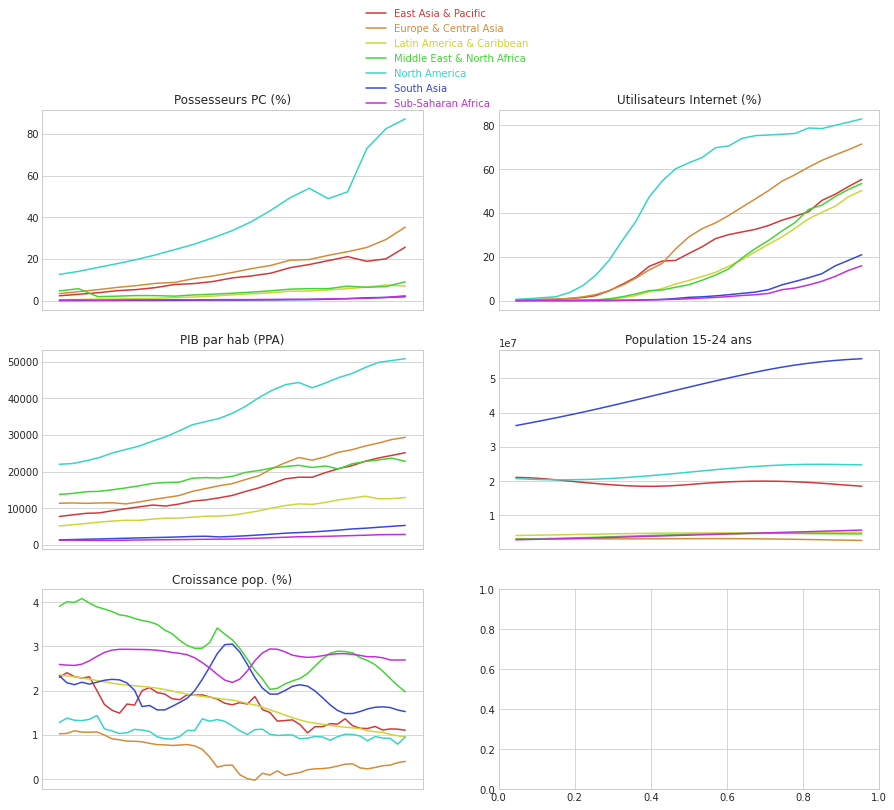

In [24]:
indicator_analysis_data = indicator_analysis_base_data.copy(deep=True)

# Calculating means
indicator_analysis_data = (indicator_analysis_data
                           .drop(columns=["Country Code"], errors="ignore")
                           .groupby(["Region", "Indicator Code"])
                           .mean()).reset_index().drop(columns=["index"])

colors = ["#d43737", "#d48b37", "#cfd437", "#42d435", "#35d4c9", "#3848d6", "#c22ed9"]
legend = {}

# Preparing the plot
x_ticks = []
x_ticks_labels = []
for column_name in indicator_analysis_data.columns:
    if re.match('r/^\d{4}$/', column_name):
        x_ticks.append(int(year))
        if year.endswith('0'):
            x_ticks_labels.append(str(year))
        else:
            x_ticks_labels.append("")
        
indicators = indicator_analysis_data["Indicator Code"].unique()
fig10, axes = plt.subplots(nrows=math.ceil(len(indicators)/2), ncols=2, figsize=(15,5*len(indicators)/2))
i = 0
for indicator in indicators:
    subdata = indicator_analysis_data[indicator_analysis_data["Indicator Code"] == indicator]\
                .dropna(how="any", axis=1)\
                .drop(columns=["Indicator Code"])\
                .set_index("Region")
    row_number = 0
    for row in subdata.iterrows():
        axes[math.floor(i/2), i%2].title.set_text(indicators_names[indicator])
        axes[math.floor(i/2), i%2].set_xticks(x_ticks)
        axes[math.floor(i/2), i%2].set_xticklabels(x_ticks_labels)
        axes[math.floor(i/2), i%2].plot(subdata.columns, subdata.iloc[row_number].values, color=colors[row_number])    
        
        # Storing the association serie/color for the legend
        legend[subdata.index[row_number]] = colors[row_number]
        row_number += 1
    i+=1

    
    
fig10.legend(legend.keys(), labelcolor=legend.values(), loc="upper center")


<a name="scoring"></a>
## H - Scoring des pays
La stratégie de scoring est la suivante : 
* On divise chaque valeur **par le maximum de sa colonne** de façon à avoir des valeurs entre 0 et 1.
* On va ensuite calculer la **somme pondérée** des colonnes pour avoir le score du pays.

Concernant les pondérations : 
* Dans un premier temps on applique une **pondération similaire** à tous les indicateurs,
* Ensuite on fera **varier les pondération** afin de voir si le classement change de manière significative.



In [25]:
def calculate_scores(coefficients, plot=False, score_name=None, return_index=False):
    """ Plot a bar chart with the scores calculated using the given coefficients
    
    Parameters:
    coefficient (dict): dictionnary of column_name: coefficient
    
    Returns:
    DataFrame: the scores sorted by DESC order or the list of sorted index
    
    """
    
    # We work on a copy of the data 
    scoring_data = final_indicators_values.copy(deep=True)
    score_column_name = "Score"

    # Dividing all columns by its max value to have [0;1] values
    scoring_data.iloc[:,:-1] = scoring_data.iloc[:,:-1].apply(lambda x: x / x.max())
    
    # For each row of the dataframe, we calculate the score
    for country_code, row in scoring_data.iterrows():
        score = 0
        for column, coef in coefficients.items():
            score += row[column] * coef
        scoring_data.at[country_code, score_column_name] = score

   
    # Dividing by the reference country score to easily get the highest potential countries
    ref_score = scoring_data.loc[REF_COUNTRY_CODE][score_column_name]
    scoring_data[score_column_name] = scoring_data[score_column_name] / ref_score

     # Sorting the results by score desc    
    scoring_data = scoring_data.sort_values(score_column_name, ascending=False)
    subset = scoring_data[score_column_name].to_frame()
    
    # Renaming the score column if asked
    if score_name != None:
        subset = subset.rename(columns={score_column_name: score_name})
        score_column_name = score_name

    # Returning the result and plotting the result if asked
    if plot:
        plt.xticks(rotation = 90)
        plt.bar(scoring_data["Country Name"], subset[score_column_name], color="goldenrod", edgecolor="#333333")

    if return_index:
        subset = subset.astype("string")
        for country_code, row in subset.iterrows():
            subset.at[country_code, score_column_name] = country_code
        subset = subset.reset_index().drop(columns=["Country Code"])
        
    return subset

<a name="reference-ranking"></a>
### Classement des pays avec des coefficients égaux (référence)

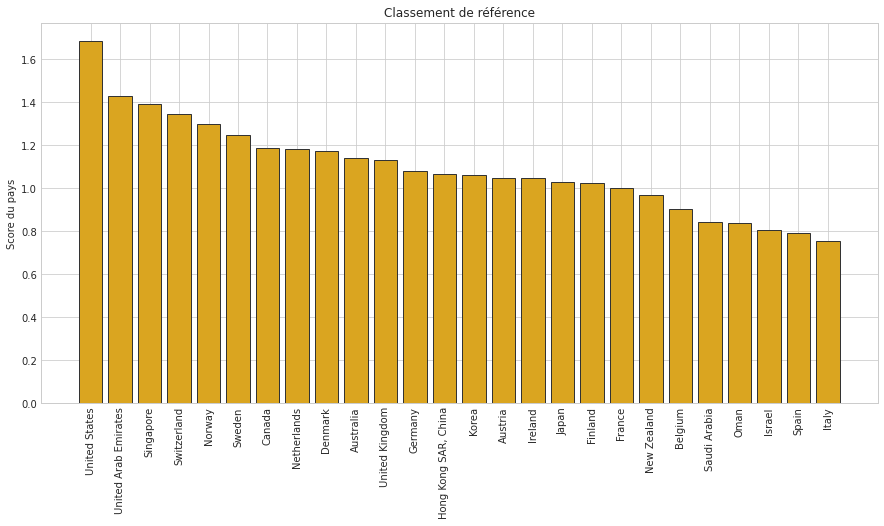

In [26]:
fig8 = plt.figure(figsize=(15,7))
plt.title("Classement de référence")
plt.ylabel("Score du pays")

scores = calculate_scores({
    'Utilisateurs Internet (%)': 1,
    'PIB par hab (PPA)': 1,
    'Population 15-24 ans': 1,
    'Croissance pop. (%)': 1,
    'Possesseurs PC (%)': 1
}, plot=True)

<a name="borda"></a>
### Impact de la modification des pondérations - Méthode Borda
On va maintenant regarder si notre classement est sensible ou non à une modification des pondérations.
Pour cela on va utiliser la méthode **Borda** : 
* On va appliquer un coefficient de 3 à un indicateur, 2 à un autre, et 1 à tous les indicateurs restants
* Pour 5 indicateurs, on va ainsi obtenir 20 classements différents de nos pays
* On applique alors la méthode Borda en considérant qu'on veut le classement des 10 meilleurs pays

Ainsi, pour chaque classement, le premier pays recevra 10 points, le second 9 points, etc... A partir du 11e, ils reçoivent tous 0 points.

En sommant, pour chaque pays, ses points obtenus à chaque classement, on obtiendra un classement global.

In [27]:
# Step 1 : we generate all possible indicator/weight possibilities
indicators = [
    'Utilisateurs Internet (%)',
    'PIB par hab (PPA)',
    'Population 15-24 ans',
    'Croissance pop. (%)',
    'Possesseurs PC (%)'
]
weights = [3,2]

all_coefficients = []
for combination in itertools.permutations(indicators, len(weights)):
    new_coefficients = {}
    for index, indicator in enumerate(indicators):
        if indicator in combination:
            new_coefficients[indicator] = weights[combination.index(indicator)]
        else: 
            new_coefficients[indicator] = 1
    all_coefficients.append(new_coefficients)
    
print("Les " + str(len(all_coefficients)) + " cas possibles ont été générés")

j=0
for coefficients in all_coefficients:
    print("\n")
    print("Classement #" + str(j) + " : ")
    for indic, coef in coefficients.items():
        if coef > 1:
            print(str(indic) + " : " + str(coef))
    
    j += 1

Les 20 cas possibles ont été générés


Classement #0 : 
Utilisateurs Internet (%) : 3
PIB par hab (PPA) : 2


Classement #1 : 
Utilisateurs Internet (%) : 3
Population 15-24 ans : 2


Classement #2 : 
Utilisateurs Internet (%) : 3
Croissance pop. (%) : 2


Classement #3 : 
Utilisateurs Internet (%) : 3
Possesseurs PC (%) : 2


Classement #4 : 
Utilisateurs Internet (%) : 2
PIB par hab (PPA) : 3


Classement #5 : 
PIB par hab (PPA) : 3
Population 15-24 ans : 2


Classement #6 : 
PIB par hab (PPA) : 3
Croissance pop. (%) : 2


Classement #7 : 
PIB par hab (PPA) : 3
Possesseurs PC (%) : 2


Classement #8 : 
Utilisateurs Internet (%) : 2
Population 15-24 ans : 3


Classement #9 : 
PIB par hab (PPA) : 2
Population 15-24 ans : 3


Classement #10 : 
Population 15-24 ans : 3
Croissance pop. (%) : 2


Classement #11 : 
Population 15-24 ans : 3
Possesseurs PC (%) : 2


Classement #12 : 
Utilisateurs Internet (%) : 2
Croissance pop. (%) : 3


Classement #13 : 
PIB par hab (PPA) : 2
Croissance pop

In [28]:
# Step 2 : we generate all rakings
reference_coefficients = {
    'Utilisateurs Internet (%)': 1,
    'PIB par hab (PPA)': 1,
    'Population 15-24 ans': 1,
    'Croissance pop. (%)': 1,
    'Possesseurs PC (%)': 1
}

# We initialize a dataframe with all the coefficients to weight 1 
rankings = calculate_scores(reference_coefficients, score_name="Reference score", return_index=True)
top_10 = rankings["Reference score"].head(15).tolist()

for index, coefficient_case in enumerate(all_coefficients):
    weighted_scores = calculate_scores(coefficient_case, 
                                       score_name="CASE_" + str(index), 
                                       return_index=True)
    rankings = rankings.merge(weighted_scores, left_index=True, right_index=True)


# Coloring the dataframe to highlight the top 10 of the reference ranking and see the differences
rankings_colors = rankings.copy(deep=True)
rankings_colors = rankings_colors.isin(top_10)

def color_cells(value):
    if value == True:
        return 'text-align:center; width: 120px; background-color:#ffefe0; font-weight:bold; border:1px solid #fac28e;'
    else:
        return 'text-align:center; width: 120px; '

print("Les couleurs nous permettent de visualiser que le Top 10 de référence ne changent pas beaucoup")
rankings.style.apply(lambda x: rankings_colors.applymap(color_cells), axis=None)

Les couleurs nous permettent de visualiser que le Top 10 de référence ne changent pas beaucoup


,Reference score,CASE_0,CASE_1,CASE_2,CASE_3,CASE_4,CASE_5,CASE_6,CASE_7,CASE_8,CASE_9,CASE_10,CASE_11,CASE_12,CASE_13,CASE_14,CASE_15,CASE_16,CASE_17,CASE_18,CASE_19
0,USA,USA,USA,ARE,USA,USA,USA,ARE,USA,USA,USA,USA,USA,ARE,ARE,ARE,ARE,USA,USA,USA,USA
1,ARE,NOR,NOR,USA,CHE,SGP,SGP,SGP,SGP,ARE,ARE,ARE,CHE,USA,SGP,USA,USA,CHE,CHE,CHE,CHE
2,SGP,ARE,CHE,NOR,SWE,ARE,ARE,USA,CHE,CHE,SGP,SGP,SGP,SGP,USA,SGP,SGP,SWE,SGP,SGP,SGP
3,CHE,SGP,SWE,SGP,NOR,NOR,NOR,NOR,ARE,NOR,CHE,CHE,SWE,NOR,NOR,CHE,CHE,SGP,SWE,SWE,SWE
4,NOR,CHE,ARE,CHE,SGP,CHE,CHE,CHE,NOR,SGP,NOR,NOR,CAN,CHE,CHE,OMN,NOR,NOR,NOR,CAN,ARE
5,SWE,SWE,SGP,SWE,DNK,SWE,SWE,SWE,SWE,SWE,SWE,GBR,NOR,SWE,OMN,NOR,SWE,DNK,DNK,NOR,NOR
6,CAN,NLD,NLD,DNK,NLD,NLD,NLD,NLD,NLD,GBR,CAN,CAN,GBR,CAN,SWE,AUS,CAN,NLD,CAN,DNK,CAN
7,NLD,DNK,DNK,NLD,CAN,DNK,CAN,CAN,DNK,JPN,DEU,SWE,NLD,AUS,AUS,CAN,AUS,CAN,NLD,NLD,DNK
8,DNK,CAN,GBR,CAN,GBR,CAN,DNK,AUS,CAN,CAN,GBR,AUS,DEU,DNK,CAN,SWE,DNK,AUS,ARE,AUS,NLD
9,AUS,GBR,CAN,GBR,ARE,AUS,DEU,DNK,AUS,DEU,JPN,JPN,DNK,NLD,NLD,GBR,NLD,GBR,AUS,GBR,AUS


Maintenant on part de ce tableau et on calcule le score de chaque pays : 

In [29]:
scores = {}
MAX_SCORE = 15

for index, row in enumerate(rankings.values.tolist()):
    for country in row:
        if not country in scores:
            scores[country] = 0
        score = MAX_SCORE - index
        scores[country] += max([score, 0])

# Sorting by score DESC
scores = dict(sorted(scores.items(), key=lambda item: item[1], reverse=True))

scores

{'USA': 307,
 'SGP': 268,
 'CHE': 260,
 'NOR': 242,
 'ARE': 238,
 'SWE': 220,
 'CAN': 173,
 'NLD': 155,
 'DNK': 143,
 'AUS': 123,
 'GBR': 115,
 'DEU': 64,
 'KOR': 41,
 'HKG': 39,
 'OMN': 33,
 'IRL': 29,
 'JPN': 27,
 'AUT': 18,
 'FIN': 11,
 'SAU': 9,
 'FRA': 5,
 'NZL': 0,
 'BEL': 0,
 'ESP': 0,
 'ITA': 0,
 'ISR': 0}

<a name="conclusion"></a>
## I - Conclusion
Il ne nous reste plus qu'à tracer les scores sur un graphiques : 

<BarContainer object of 21 artists>

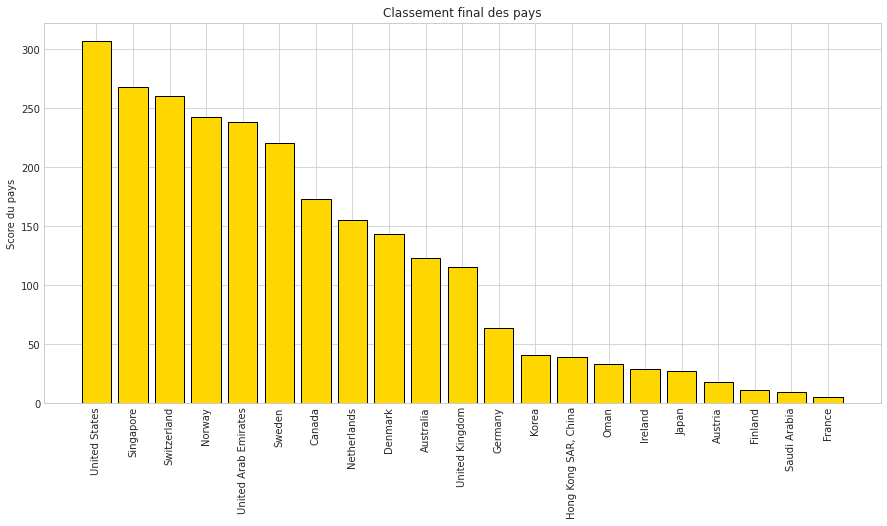

In [30]:
# Renaming the country code by the country name and keeping only scores > 0
named_scores = {}
for country_code, score in scores.items():
    if score > 0:
        country_name = countries[countries["Country Code"] == country_code]["Short Name"].values[0]
        named_scores[country_name] = score

fig9 = plt.figure(figsize=(15,7))
plt.xticks(rotation = 90)
plt.title("Classement final des pays")
plt.ylabel("Score du pays")
plt.bar(named_scores.keys(), named_scores.values(), color="gold", edgecolor="black")